In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from zipfile import ZipFile
import PIL
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -u "/content/drive/My Drive/folder/example.zip" -d "/content/drive/My Drive/folder/NewFolder"


In [ ]:
!unzip -u '/content/drive/MyDrive/Colab Notebooks/ColabResearch/fruits-360-original-size.zip' -d '/content/drive/MyDrive/Colab Notebooks/ColabResearch/data/'

In [ ]:
train_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ColabResearch/data/fruits-360-original-size/Training')
test_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ColabResearch/data/fruits-360-original-size/Test')

In [ ]:
image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

6231

In [ ]:
fruits = list(train_dir.glob("Apple Pink Lady/*.jpg"))

IndexError: ignored

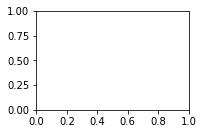

In [ ]:
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
batch_size = 128
img_height = 100
img_width = 100

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
) 

Found 6231 files belonging to 24 classes.
Using 4985 files for training.


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6231 files belonging to 24 classes.
Using 1246 files for validation.


In [ ]:
class_names = train_data.class_names
num_classes = len(class_names)

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size = 128,
    class_mode='categorical'
)

Found 6231 images belonging to 24 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size = 128, 
    class_mode='categorical' 
)


Found 3110 images belonging to 24 classes.


In [ ]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

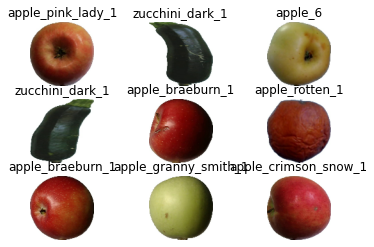

In [ ]:
#to take 1 batch
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
model = tf.keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),

    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(2),
     keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_generator,
  steps_per_epoch=15,  
  validation_steps=20,
  validation_data=test_generator,
  epochs=10,
  verbose=1
)

Epoch 1/10
15/15 [==============================] - 21s 1s/step - loss: 0.0208 - accuracy: 0.9948 - val_loss: 0.0066 - val_accuracy: 0.9992
Epoch 2/10
15/15 [==============================] - 20s 1s/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 20s 1s/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 20s 1s/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 8.7137e-04 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 20s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.9255e-04 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 21s 1s/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 2.7421e-04 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 20s 1s/step - loss: 8.7497e-04 - accuracy: 1.0000 - val_loss: 1.6377e-04 - val_accuracy: 1.0000


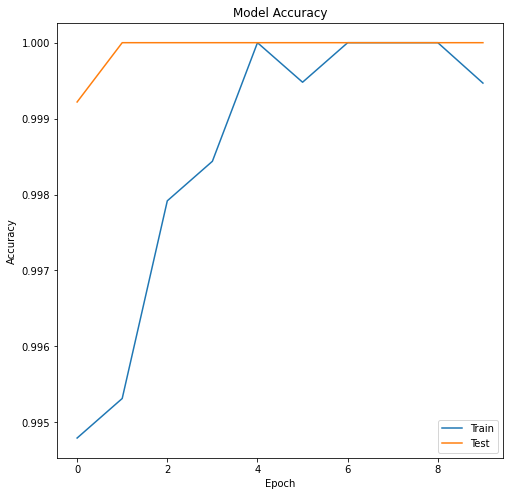

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

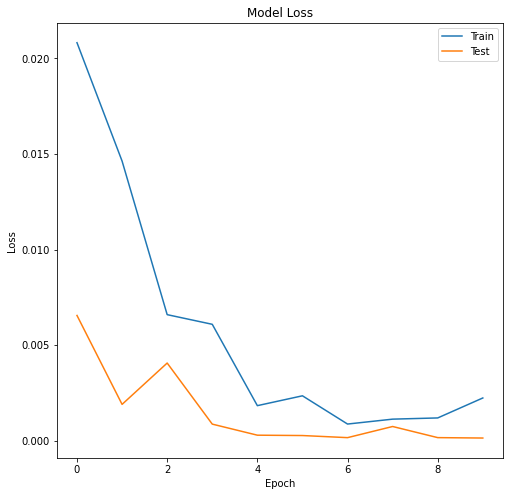

In [ ]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)


25/25 [==============================] - 14s 541ms/step - loss: 1.4090e-04 - accuracy: 1.0000


In [ ]:
print('Loss:', loss)
print('Accuracy:', acc)

Loss: 0.00014089739124756306
Accuracy: 1.0
